# Del 9: Priprava in čiščenje podatkov - napredno

## Working With Strings In Pandas

### Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# read the data sets into pandas
world_dev = pd.read_csv("data/World_dev.csv")
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [4]:
world_dev.head(2)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0


In [5]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [8]:
merged = pd.merge(left=happiness2015, right=world_dev, how="left", left_on="Country", right_on="ShortName")


col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

merged.rename(col_renaming, axis=1, inplace=True)

In [9]:
merged.head(2)

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0


### Using Apply to Transform Strings

In [10]:
merged["CurrencyUnit"].head()

0        Swiss franc
1      Iceland krona
2       Danish krone
3    Norwegian krone
4    Canadian dollar
Name: CurrencyUnit, dtype: object

In [11]:
words = 'Danish krone'
words.split()[-1]

'krone'

In [12]:
def extract_last_word(element):
    return str(element).split()[-1]

In [13]:
merged["currencyApply"] = merged["CurrencyUnit"].apply(extract_last_word)

In [14]:
merged["currencyApply"].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: currencyApply, dtype: object

### Vectorized String Methods

<img src="./images/Split.png">

<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>

<img src="./images/Syntax.png">

In [15]:
merged["CurrencyUnit"].str[0:5].head()

0    Swiss
1    Icela
2    Danis
3    Norwe
4    Canad
Name: CurrencyUnit, dtype: object

In [17]:
merged["CurrencyUnit"].str.upper().str.split().str.get(-1).head()

0     FRANC
1     KRONA
2     KRONE
3     KRONE
4    DOLLAR
Name: CurrencyUnit, dtype: object

#### Exploring Missing Values with Vectorized String Methods

In [18]:
merged["CurrencyUnit"].isnull().sum()

13

In [19]:
def compute_lengths(element):
    return len(str(element))

In [21]:
merged["CurrencyUnit"].apply(compute_lengths).value_counts(dropna=False)

14    21
4     20
12    17
13    14
3     13
15    13
16    12
18     9
17     9
11     8
22     7
25     5
19     3
9      2
26     1
23     1
10     1
39     1
20     1
Name: CurrencyUnit, dtype: int64

In [22]:
def compute_lengths(element):
    if pd.isnull(element):
        pass
    else:
        return len(str(element))

In [23]:
merged["CurrencyUnit"].apply(compute_lengths).value_counts(dropna=False)

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
26.0     1
23.0     1
10.0     1
39.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

In [25]:
merged["CurrencyUnit"].str.len().value_counts(dropna=False)

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
26.0     1
23.0     1
10.0     1
39.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

## Regular Expressions in Pandas

### The Regular Expression Module

In [26]:
import re

In [27]:
m = re.search("and", "hand")

In [28]:
print(m)

<re.Match object; span=(1, 4), match='and'>


In [29]:
m = re.search("and", "car")

In [30]:
print(m)

None


### Finding Specific Words in Strings

<img src="./images/set_syntax_breakdown.svg">

<img src="./images/basic_match_2.svg">

In [32]:
merged["SpecialNotes"].head(10)

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Fiscal year end: March 31; reporting period fo...
5    A simple multiplier is used to convert the nat...
6    A simple multiplier is used to convert the nat...
7    Fiscal year end: June 30; reporting period for...
8    Fiscal year end: March 31; reporting period fo...
9    Fiscal year end: June 30; reporting period for...
Name: SpecialNotes, dtype: object

In [34]:
pattern = r"[Nn]ational accounts"

In [35]:
merged["SpecialNotes"].str.contains(pattern).head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4     True
5    False
6    False
7     True
8     True
9     True
Name: SpecialNotes, dtype: object

In [36]:
merged["SpecialNotes"].str.contains(pattern).sum()

54

In [37]:
merged["SpecialNotes"].str.contains(pattern).value_counts(dropna=False)

NaN      65
True     54
False    39
Name: SpecialNotes, dtype: int64

In [38]:
national_accounts = merged["SpecialNotes"].str.contains(pattern)

### Using Regular Expressions to Select Data

In [40]:
#merged[national_accounts]

In [41]:
try:
    merged[national_accounts]
except ValueError as e:
    print(e)

Cannot mask with non-boolean array containing NA / NaN values


In [42]:
national_accounts = merged["SpecialNotes"].str.contains(pattern, na=False)

In [43]:
merged[national_accounts].head(2)

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,currencyApply
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona


### Import new dataset

In [44]:
hn = pd.read_csv('data/hacker_news.csv')

In [45]:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48


In [46]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20099 non-null  int64 
 1   title         20099 non-null  object
 2   url           17659 non-null  object
 3   num_points    20099 non-null  int64 
 4   num_comments  20099 non-null  int64 
 5   author        20099 non-null  object
 6   created_at    20099 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [48]:
# koliko naslovov novic vsebuje besedo python/Python
pattern = r"[Pp]ython"
hn["title"].str.contains(pattern).sum()

160

In [53]:
# novice ki vsebujejo besedo ruby/Ruby
pattern = r"[Rr]uby"
hn[hn["title"].str.contains(pattern)]["title"].head()

190                    Ruby on Google AppEngine Goes Beta
484          Related: Pure Ruby Relational Algebra Engine
1388    Show HN: HTTPalooza  Ruby's greatest HTTP clie...
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2022    Show HN: CrashBreak  Reproduce exceptions as f...
Name: title, dtype: object

### Quantifiers


<p></p><center><img alt="quantifier example" src="images/quantifier_example.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_numeric.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_other.svg"></center><p></p>


In [56]:
# email, e-mail
pattern = r"e-?mail"
hn["title"].str.contains(pattern).sum()

86

In [59]:
# vse naslove, ki vsebujejo letnice med 1900-1999
pattern = r"19[0-9]{2}"
hn[hn["title"].str.contains(pattern)]["title"].head()

234    US DoD Using 1970s IBM Series/1 and Floppy Dis...
309              The Box: A Replacement for Files (1999)
423    Ask HN: Imagine it's 1993  what would you put ...
445    New Directions in Cryptography by Diffie and H...
464    Germany declares 1915 Armenian killings a geno...
Name: title, dtype: object

### Character Classes

In [60]:
patern = "\[pdf\]"


<p></p><center><img alt="character classes one" src="images/character_classes_v2_1.svg"></center><p></p>

<p></p><center><img alt="character classes two" src="images/character_classes_v2_2.svg"></center><p></p>


    [pdf]
    [urnik]

In [62]:
pattern ="\[\w+\]"

In [63]:
hn[hn["title"].str.contains(pattern)]["title"].head()

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object

### Raw strings

In [67]:
print("hello\ntest\b")

hello
test


In [65]:
print("hello\\ntest")

hello\ntest


In [66]:
print(r"hello\ntest")

hello\ntest


### Extracting Substrings from a Series

In [70]:
tag_5 = hn[hn["title"].str.contains(pattern)]["title"].head()
tag_5

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object

In [74]:
pattern = r"(\[\w+\])"
tag_5.str.extract(pattern)

,0
66,[pdf]
100,[German]
159,[pdf]
162,[pdf]
195,[Beta]


In [77]:
pattern = r"\[(\w+)\]"
tag_5.str.extract(pattern, expand=False).value_counts()

pdf       3
German    1
Beta      1
Name: title, dtype: int64

In [80]:
# nad celotnimi podatki
pattern = r"\[(\w+)\]"
hn["title"].str.extract(pattern, expand=False).value_counts().head(10)

pdf           276
video         111
2015            3
audio           3
2014            2
slides          2
beta            2
NSFW            1
Map             1
JavaScript      1
Name: title, dtype: int64

### Using Flags to Modify Regex Patterns

In [84]:
import re

email_tests = pd.Series(["email", "Email", "eMail", "EMAIL", "test"])
email_tests.str.contains(r"email", flags=re.I)

0     True
1     True
2     True
3     True
4    False
dtype: bool

In [87]:
rorbots_test = pd.Series(['@robot9!', '@robot4&', '@robot9$', '@robot7%', '@robot3$'])
rorbots_test.str.contains(r"@robot\d\W")

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [88]:
phone_test = pd.Series(['1-966-847-3131', '54-908-42-42424'])
phone_test.str.contains(r"\d{1,2}-\d{3}-\d{2,3}-\d{4,}")

0    True
1    True
dtype: bool

In [100]:
dates_test = pd.Series(['23rd June 2018 17:54', '2nd May 1999 4:54', '2lt May 1999 4:54'])
dates_test.str.contains(r"\d{1,2}/st|nd|rd|th/\s/January|June|May/\s\d{4}\s\d{1,2}:\d{1,2}")


0     True
1     True
2    False
dtype: bool

### Primer: Create a frequency table of the different capitalizations of SQL

In [102]:
pattern_sql = r"\w+SQL"
hn_sql = hn[hn["title"].str.contains(pattern_sql, flags=re.I)].copy()

In [104]:
hn_sql["type_sql"] = hn_sql["title"].str.extract(r"(\w+SQL)", flags=re.I)

In [106]:
hn_sql["type_sql"].value_counts()

PostgreSQL    27
NoSQL         16
MySQL         12
MemSQL         1
SparkSQL       1
nosql          1
mySql          1
CloudSQL       1
Name: type_sql, dtype: int64

In [107]:
hn_sql["type_sql"] = hn_sql["type_sql"].str.lower()

In [109]:
hn_sql.head(3)

,id,title,url,num_points,num_comments,author,created_at,type_sql
142,10957172,PostgreSQL: Linux VS Windows part 2,http://www.sqig.net/2016/01/postgresql-linux-v...,16,3,based2,1/23/2016 4:21,postgresql
221,11544342,MemSQL (YC W11) Raises $36M Series C,http://blog.memsql.com/memsql-raises-series-c/,74,14,ericfrenkiel,4/21/2016 18:32,memsql
882,10413272,Pgmemcahe :A PostgreSQL memcache functions,https://github.com/ohmu/pgmemcache/,2,1,websec,10/19/2015 14:55,postgresql


In [110]:
hn_sql.pivot_table(index="type_sql", values="num_comments", aggfunc="mean")

,num_comments
type_sql,
cloudsql,5.000000
memsql,14.000000
mysql,12.230769
nosql,14.529412
postgresql,25.962963
sparksql,1.000000


### Primer: Versions of Python

In [117]:
hn["title"].str.extract(r"[Pp]ython\s([\d\.]+)").value_counts()

3        10
2         3
3.5       3
3.6       2
1.5       1
2.7       1
3.5.0     1
4         1
8         1
dtype: int64

### Primer: Extracting URL Parts

In [118]:
hn["url"].head()

0              http://www.interactivedynamicvideo.com/
1    http://www.thewire.com/entertainment/2013/04/f...
2    https://www.amazon.com/Technology-Ventures-Ent...
3    http://www.nytimes.com/2007/11/07/movies/07ste...
4    http://arstechnica.com/business/2015/10/comcas...
Name: url, dtype: object

In [120]:
pattern = r"(.+)://([\w\.]+)/?(.*)"
hn["url"].str.extract(pattern).head()

,0,1,2
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...


#### Using Named Capture Groups

In [121]:
pattern = r"(?P<protocol>.+)://(?P<domain>[\w\.]+)/?(?P<path>.*)"
hn["url"].str.extract(pattern).head()

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...


### Primer: Clean a String Column, Aggregate the Data, and Plot the Results

In [123]:
merged["IncomeGroup"].unique()

array(['High income: OECD', 'Upper middle income', 'High income: nonOECD',
       nan, 'Lower middle income', 'Low income'], dtype=object)

In [126]:
pv_incomes = merged.pivot_table(values="Happiness Score", index="IncomeGroup", aggfunc="mean")

In [127]:
pv_incomes

,Happiness Score
IncomeGroup,
High income: OECD,6.674000
High income: nonOECD,6.250765
Low income,3.925625
Lower middle income,4.927971
Upper middle income,5.426718


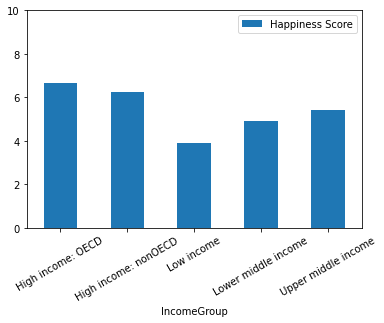

In [130]:
pv_incomes.plot(kind="bar", rot=30, ylim=(0,10))
plt.show()

In [134]:
merged["IncomeGroup"] = merged["IncomeGroup"].str.replace(" income", "").str.replace(":", "").str.upper()
merged["IncomeGroup"].unique()

array(['HIGH OECD', 'UPPER MIDDLE', 'HIGH NONOECD', nan, 'LOWER MIDDLE',
       'LOW'], dtype=object)

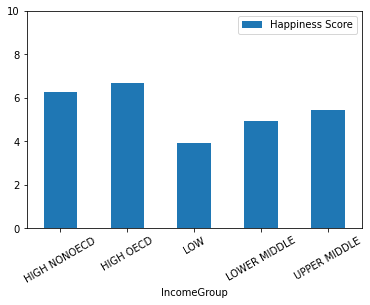

In [135]:
pv_incomes = merged.pivot_table(values="Happiness Score", index="IncomeGroup", aggfunc="mean")
pv_incomes.plot(kind="bar", rot=30, ylim=(0,10))
plt.show()

<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>

## Working With Missing Data

### Introduction

In [136]:
happiness2015 = pd.read_csv('data/wh_2015.csv') 
happiness2016 = pd.read_csv('data/wh_2016.csv') 
happiness2017 = pd.read_csv('data/wh_2017.csv')

In [137]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

In [138]:
shape_2015

(164, 13)

In [139]:
shape_2016

(164, 14)

In [140]:
shape_2017

(164, 13)

### Identifying Missing Values

In [143]:
happiness2015[happiness2015["Happiness Score"].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [144]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [145]:
happiness2016.isnull().sum()

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [146]:
happiness2017.isnull().sum()

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

### Correcting Data Cleaning Errors that Result in Missing Values

In [147]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)

In [148]:
combined.head()

,Country,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Economy..GDP.per.Capita.,Family,Freedom,Generosity,Happiness Rank,Happiness Score,...,Health..Life.Expectancy.,Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Trust..Government.Corruption.,Upper Confidence Interval,Whisker.high,Whisker.low,Year
0,Switzerland,2.51738,NaN,1.39651,NaN,1.34951,0.66557,0.29678,1.0,7.587,...,NaN,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,NaN,2015
1,Iceland,2.70201,NaN,1.30232,NaN,1.40223,0.62877,0.43630,2.0,7.561,...,NaN,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,NaN,2015
2,Denmark,2.49204,NaN,1.32548,NaN,1.36058,0.64938,0.34139,3.0,7.527,...,NaN,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,NaN,2015
3,Norway,2.46531,NaN,1.45900,NaN,1.33095,0.66973,0.34699,4.0,7.522,...,NaN,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,NaN,2015
4,Canada,2.45176,NaN,1.32629,NaN,1.32261,0.63297,0.45811,5.0,7.427,...,NaN,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,NaN,2015


In [150]:
combined.shape

(492, 23)

In [151]:
combined.isnull().sum()

Country                            0
Dystopia Residual                177
Dystopia.Residual                337
Economy (GDP per Capita)         177
Economy..GDP.per.Capita.         337
Family                            22
Freedom                           22
Generosity                        22
Happiness Rank                   177
Happiness Score                  177
Happiness.Rank                   337
Happiness.Score                  337
Health (Life Expectancy)         177
Health..Life.Expectancy.         337
Lower Confidence Interval        335
Region                           177
Standard Error                   334
Trust (Government Corruption)    177
Trust..Government.Corruption.    337
Upper Confidence Interval        335
Whisker.high                     337
Whisker.low                      337
Year                               0
dtype: int64

##### 2017

In [152]:
happiness2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [160]:
happiness2017.columns = happiness2017.columns.str.replace(".", " ", regex=True) \
                    .str.replace("\s+", " ", regex=True) \
                    .str.strip() \
                    .str.upper()

In [161]:
happiness2017.head(2)

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,WHISKER HIGH,WHISKER LOW,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,GENEROSITY,TRUST GOVERNMENT CORRUPTION,DYSTOPIA RESIDUAL,YEAR
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


##### 2016

In [165]:
happiness2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [168]:
happiness2016.columns = happiness2016.columns.str.replace(r"[\(\)]", "", regex=True).str.strip().str.upper()

In [169]:
happiness2016.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


##### 2015

In [170]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [171]:
happiness2015.columns = happiness2015.columns.str.replace(r"[\(\)]", "", regex=True).str.strip().str.upper()

In [172]:
happiness2015.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [173]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)

In [174]:
combined.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

### Visualizing Missing Data

In [175]:
import seaborn as sns

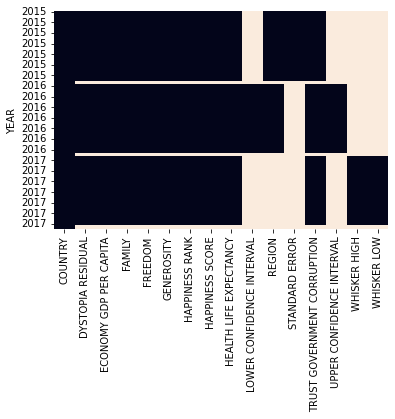

In [176]:
combined_updated = combined.set_index("YEAR")
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

In [181]:
combined[combined["YEAR"]==2017]["REGION"].isnull().sum()

164

### Using Data From Additional Sources to Fill in Missing Values

In [184]:
regions2015 = happiness2015[['COUNTRY', 'REGION']].copy()
regions2016 = happiness2016[['COUNTRY', 'REGION']].copy()
regions = pd.concat([regions2015, regions2016], ignore_index=True)
regions.dropna(inplace=True)
regions.drop_duplicates(inplace=True)
regions.head()

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [186]:
regions.shape

(164, 2)

In [187]:
combined = pd.merge(left=combined, right=regions, on="COUNTRY", how="left")

In [188]:
combined.shape

(492, 18)

In [190]:
combined.head(3)

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,REGION_x,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION_y
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,2015,Western Europe
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,2015,Western Europe
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,2015,Western Europe


In [ ]:
combined = combined.drop("REGION_x", axis=1)

In [193]:
combined.rename(columns={"REGION_y": "REGION"}, inplace=True)

In [194]:
combined.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
REGION                           0
dtype: int64

### Identifying Duplicates Values

In [195]:
combined.columns

Index(['COUNTRY', 'DYSTOPIA RESIDUAL', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'FREEDOM', 'GENEROSITY', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'HEALTH LIFE EXPECTANCY', 'LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR',
       'TRUST GOVERNMENT CORRUPTION', 'UPPER CONFIDENCE INTERVAL',
       'WHISKER HIGH', 'WHISKER LOW', 'YEAR', 'REGION'],
      dtype='object')

In [197]:
combined[combined.duplicated(["COUNTRY", "YEAR"])]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION


In [203]:
len(combined["COUNTRY"].unique())

164

In [204]:
combined["COUNTRY"] = combined["COUNTRY"].str.upper()

In [205]:
combined[combined.duplicated(["COUNTRY", "YEAR"])]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


### Correcting Duplicates Values

In [206]:
combined[combined["COUNTRY"] == "SOMALILAND REGION"]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
90,SOMALILAND REGION,2.11032,0.18847,0.95152,0.46582,0.50318,91.0,5.057,0.43873,NaN,0.06161,0.39928,NaN,NaN,NaN,2015,Sub-Saharan Africa
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
260,SOMALILAND REGION,2.43801,0.25558,0.75862,0.39130,0.51479,97.0,5.057,0.33108,4.934,NaN,0.36794,5.18,NaN,NaN,2016,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


In [207]:
combined = combined.drop_duplicates(["COUNTRY", "YEAR"])

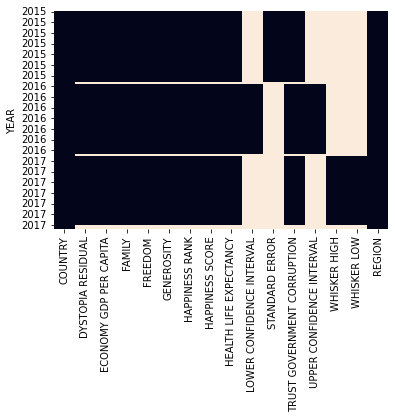

In [209]:
combined_updated = combined.set_index("YEAR")
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

### Handle Missing Values by Dropping Columns

In [210]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 
                   'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 
                   'WHISKER LOW']

In [211]:
combined_droped = combined.drop(columns_to_drop, axis=1)

In [212]:
missing = combined_droped.isnull().sum()

In [214]:
missing

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
dtype: int64

In [217]:
combined.notnull().sum().sort_values()

WHISKER LOW                    155
WHISKER HIGH                   155
LOWER CONFIDENCE INTERVAL      157
UPPER CONFIDENCE INTERVAL      157
STANDARD ERROR                 158
HEALTH LIFE EXPECTANCY         470
DYSTOPIA RESIDUAL              470
ECONOMY GDP PER CAPITA         470
FAMILY                         470
FREEDOM                        470
GENEROSITY                     470
HAPPINESS RANK                 470
HAPPINESS SCORE                470
TRUST GOVERNMENT CORRUPTION    470
COUNTRY                        489
YEAR                           489
REGION                         489
dtype: int64

In [218]:
combined_droped = combined.dropna(thresh=159, axis=1).copy()

In [219]:
combined_droped.isnull().sum()

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
dtype: int64

### Analyzing Missing Data

In [220]:
sorted_data = combined_droped.set_index("REGION").sort_values(["REGION", "HAPPINESS SCORE"])

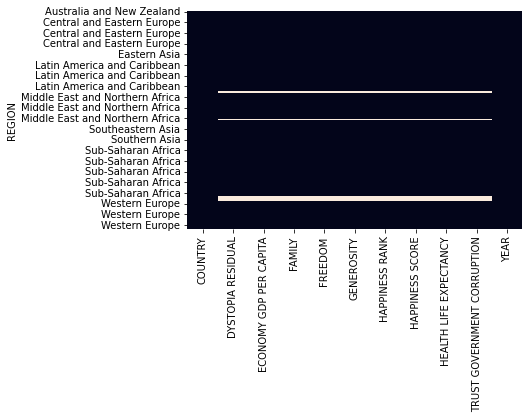

In [221]:
sns.heatmap(sorted_data.isnull(),cbar=False)
plt.show()

### Handling Missing Values with Imputation

In [222]:
happiness_mean = combined_droped["HAPPINESS SCORE"].mean()

In [223]:
happiness_mean

5.370727659882891

In [224]:
combined_droped["HAPPINESS SCORE UPDATED"] = combined_droped["HAPPINESS SCORE"].fillna(happiness_mean)

In [225]:
combined_droped["HAPPINESS SCORE UPDATED"].mean()

5.370727659882891

### Dropping Rows

In [226]:
combined_droped = combined_droped.dropna()

In [227]:
combined_droped.isnull().sum()

COUNTRY                        0
DYSTOPIA RESIDUAL              0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
FREEDOM                        0
GENEROSITY                     0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
HEALTH LIFE EXPECTANCY         0
TRUST GOVERNMENT CORRUPTION    0
YEAR                           0
REGION                         0
HAPPINESS SCORE UPDATED        0
dtype: int64

## Identifying Hidden Missing Data

### Primer: Happiness 2015

In [228]:
happiness2015 = pd.read_csv('data/wh_2015_special.csv')

In [229]:
happiness2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [230]:
happiness2015["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia', '.'], dtype=object)

In [231]:
happiness2015[happiness2015["Region"] == "."]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,.,?,.,.,.,.,.,.,.,.,.,2015
159,Namibia,.,?,.,.,.,.,.,.,.,.,.,2015
160,Puerto Rico,.,?,.,.,.,.,.,.,.,.,.,2015
161,Somalia,.,?,.,.,.,.,.,.,.,.,.,2015
162,Somaliland Region,.,?,.,.,.,.,.,.,.,.,.,2015
163,South Sudan,.,?,.,.,.,.,.,.,.,.,.,2015


In [233]:
happiness2015 = pd.read_csv('data/wh_2015_special.csv', na_values=".")
happiness2015.replace("?", np.nan, inplace=True)
happiness2015[happiness2015["Region"].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


### Primer: Diabetes

In [234]:
diabetes = pd.read_csv('data/pima-indians-diabetes_data.csv')

In [235]:
diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [236]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [237]:
diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [238]:
diabetes.loc[diabetes["BMI"] == 0, "BMI"] = np.nan

In [239]:
diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Analyzing missingness percentage

In [243]:
(diabetes.isnull().sum() / diabetes.shape[0])*100

Pregnant              0.000000
Glucose               0.651042
Diastolic_BP          4.557292
Skin_Fold            29.557292
Serum_Insulin        48.697917
BMI                   1.432292
Diabetes_Pedigree     0.000000
Age                   0.000000
Class                 0.000000
dtype: float64

## Andvance Visualization of Missing Data

In [244]:
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

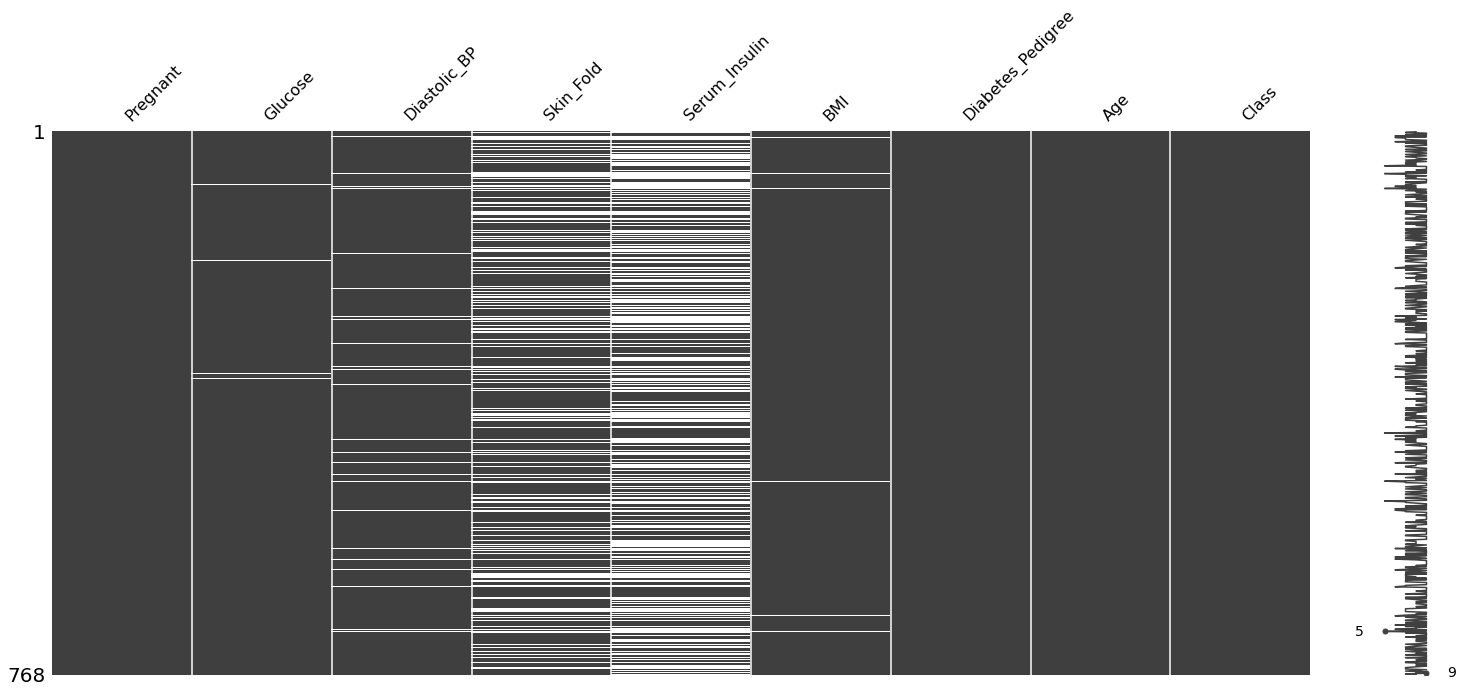

In [245]:
msno.matrix(diabetes)
plt.show()

### Missingness Patterns

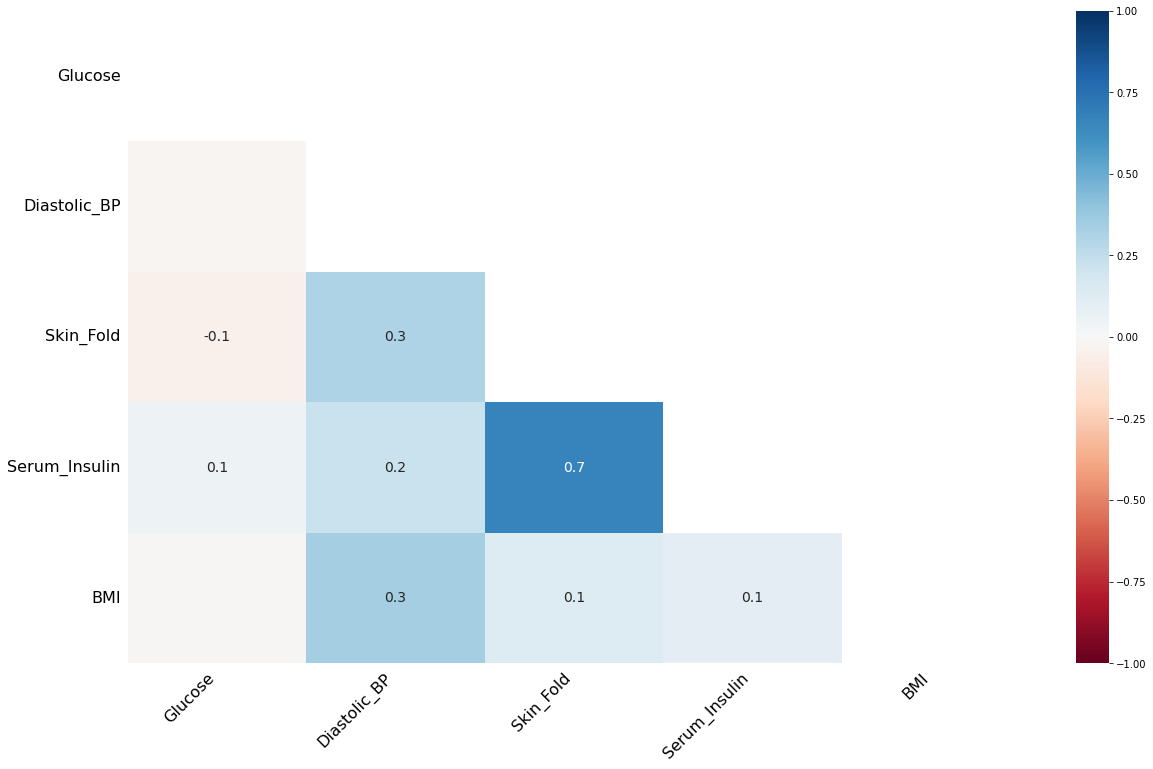

In [246]:
msno.heatmap(diabetes)
plt.show()

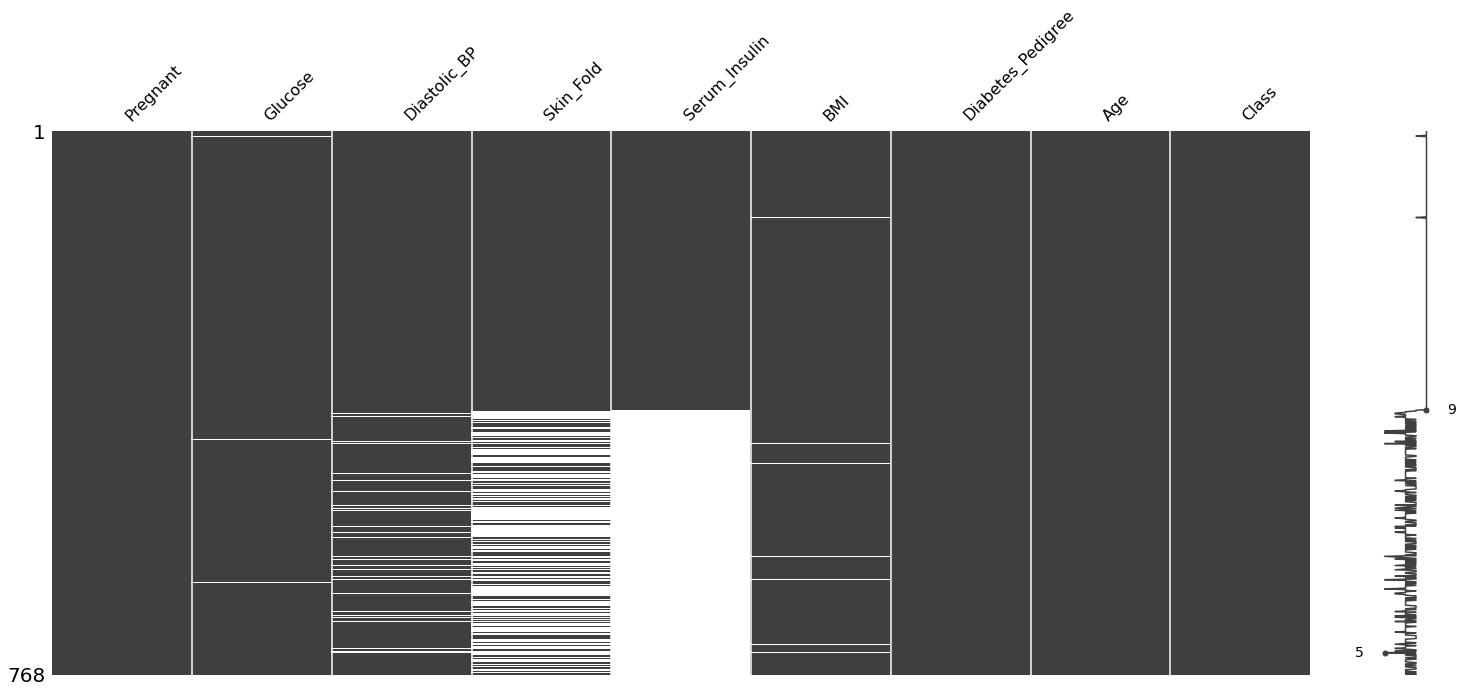

In [247]:
msno.matrix(diabetes.sort_values("Serum_Insulin"))
plt.show()

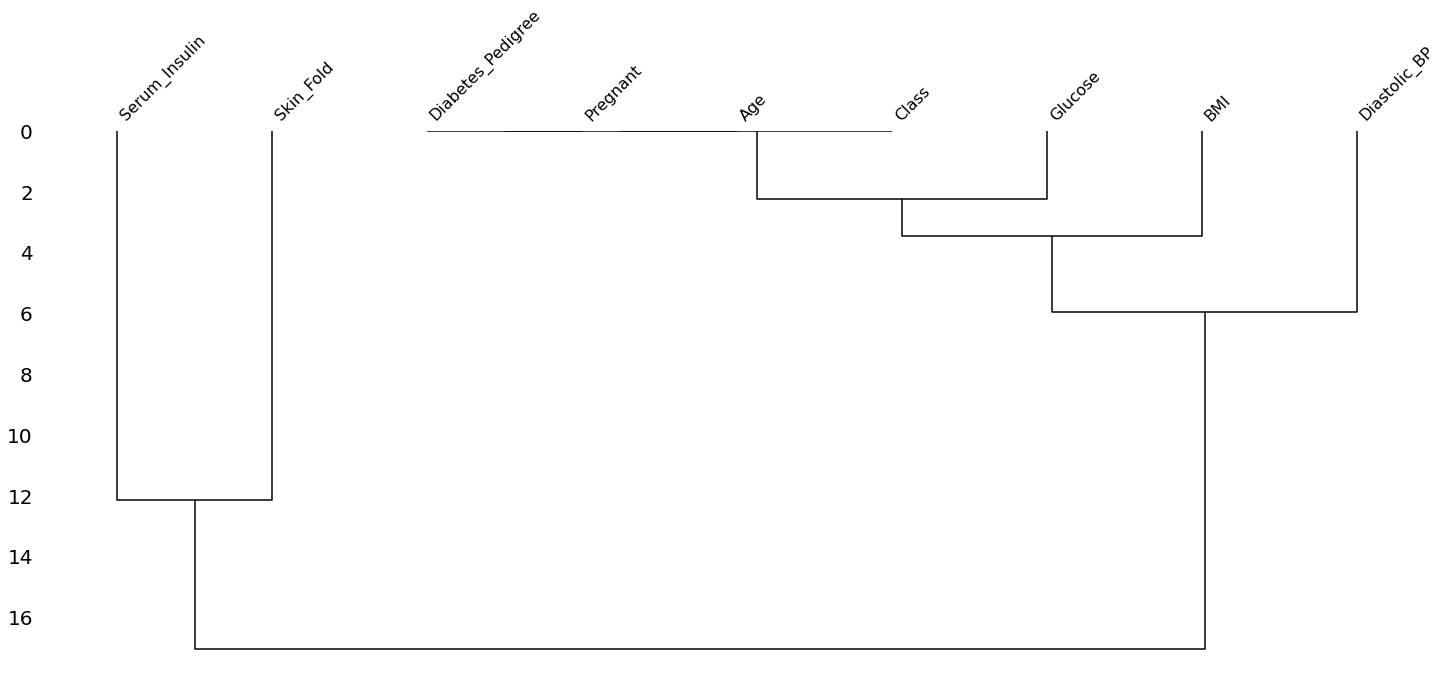

In [248]:
msno.dendrogram(diabetes)
plt.show()